In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Re-define the folder path
folder_path = "/home/coder/CVPractical/validation_loss/output"

# dictionary to store mean and std per file
summary = {
    "statistic": ["mean", "std"]
}

# loop through files and process matching ones
for filename in os.listdir(folder_path):
    if filename.startswith("val_loss_") and filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)

            # get last row with index "mean"
            mean_row = df[df["batch_idx"] == "mean"].iloc[0, 1:8]  # segments 0 to 6

            # convert values to float
            values = mean_row.astype(float).values

            # compute mean and std of those values
            mean_val = np.mean(values)
            std_val = np.std(values)

            # extract numeric identifier from filename
            key = filename.replace("val_loss_", "").replace(".csv", "")
            summary[key] = [mean_val, std_val]

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# create DataFrame from summary and save
summary_df = pd.DataFrame(summary)
output_csv_path = "/home/coder/CVPractical/validation_loss/output/val_loss_summary.csv"
summary_df.to_csv(output_csv_path, index=False)


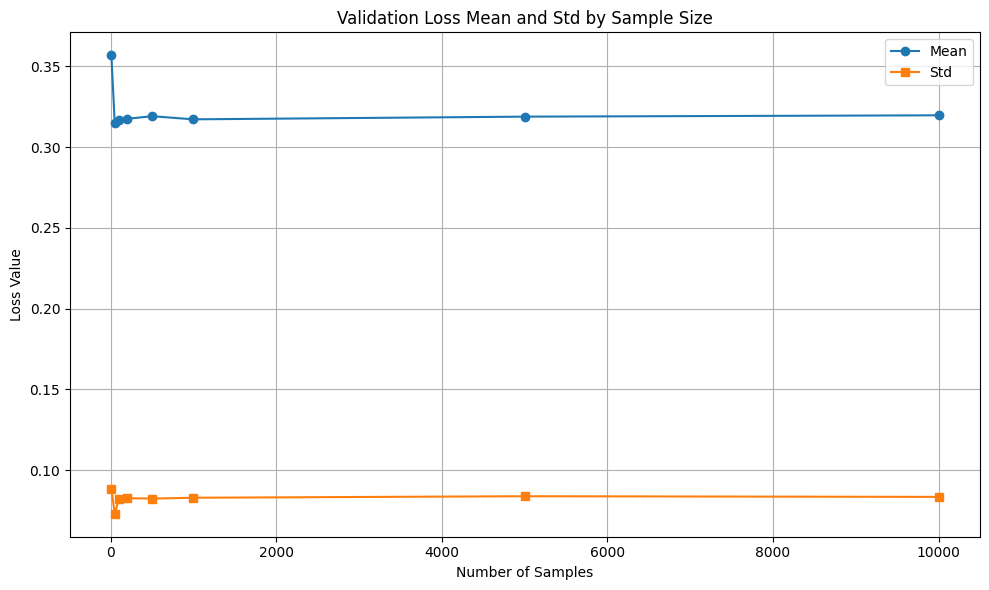

In [4]:
# extract the sample sizes (column headers, excluding 'statistic')
sample_sizes = summary_df.columns[1:]
means = summary_df.loc[summary_df['statistic'] == 'mean', sample_sizes].values.flatten().astype(float)
stds = summary_df.loc[summary_df['statistic'] == 'std', sample_sizes].values.flatten().astype(float)

# convert sample size labels to integers for sorting
sample_sizes_int = list(map(int, sample_sizes))
sorted_indices = sorted(range(len(sample_sizes_int)), key=lambda i: sample_sizes_int[i])
sample_sizes_sorted = [sample_sizes_int[i] for i in sorted_indices]
means_sorted = [means[i] for i in sorted_indices]
stds_sorted = [stds[i] for i in sorted_indices]

# plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_sorted, means_sorted, marker='o', label='Mean')
plt.plot(sample_sizes_sorted, stds_sorted, marker='s', label='Std')
plt.xlabel('Number of Samples')
plt.ylabel('Loss Value')
plt.title('Validation Loss Mean and Std by Sample Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

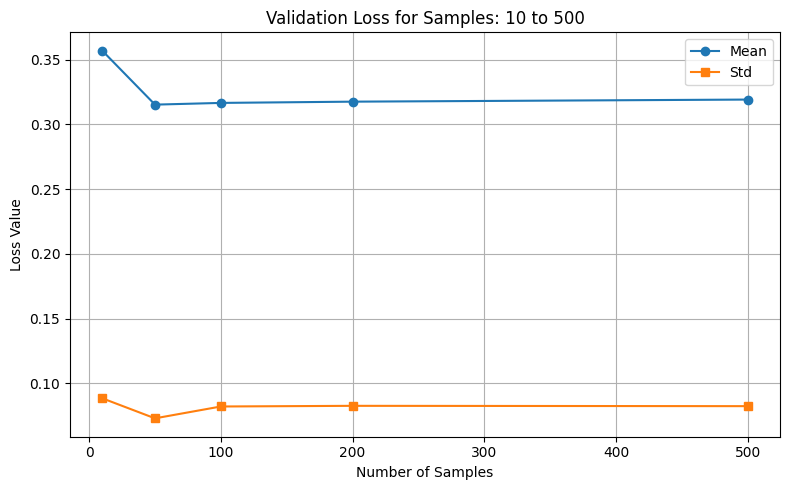

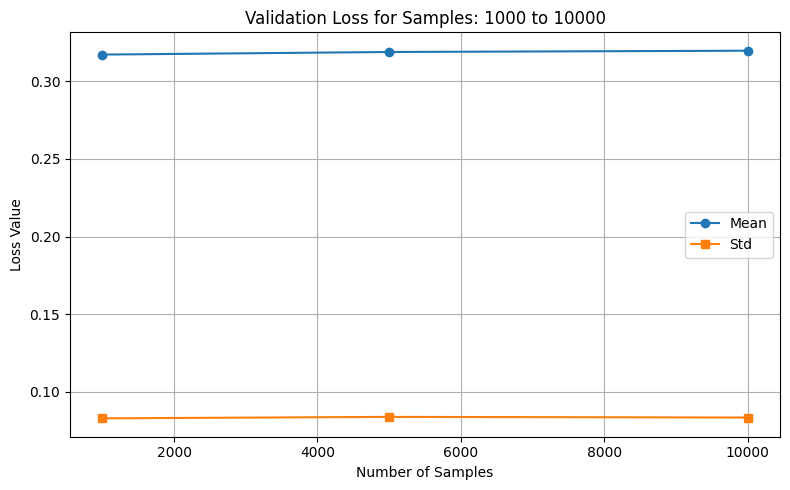

In [7]:
sample_size_ints = list(map(int, sample_sizes))
sample_info = list(zip(sample_size_ints, means, stds))
# split groups
group1 = [x for x in sample_info if x[0] in [10, 50, 100, 200, 500]]
group2 = [x for x in sample_info if x[0] in [1000, 5000, 10000]]

def plot_group(data, title):
    sizes, means, stds = zip(*sorted(data))
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, means, marker='o', label='Mean')
    plt.plot(sizes, stds, marker='s', label='Std')
    plt.xlabel('Number of Samples')
    plt.ylabel('Loss Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# plot both groups
plot_group(group1, 'Validation Loss for Samples: 10 to 500')
plot_group(group2, 'Validation Loss for Samples: 1000 to 10000')